In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from spacy.lang.pl import Polish

from tool.annotations_utils import read_annotations
from tool.file_and_directory_management import read_file_to_list
PATH_TO_TITLES = '..\\data\\novels_titles\\polish.txt'
PATH_TO_CHARACTERS_LISTS = '..\\data\\lists_of_characters\\'
PATH_TO_ANNOTATIONS = '..\\experiments\\polish\\'
PATH_TO_GOLD_ANNOTATIONS = '..\\data\\testing_sets\\test_polish_gold_standard\\'

In [3]:
TITLES = read_file_to_list(PATH_TO_TITLES)
for i in range(len(TITLES)):
    TITLES[i] = '_'.join(TITLES[i].split(' '))

TITLES

['Hrabia_Monte_Christo',
 'Nad_Niemnem',
 'Robinson_Crusoe',
 'Przedwiosnie',
 'W_pustyni_i_w_puszczy',
 'Ksiega_dzungli']

In [120]:
def count_characters_occurrences(annotations, characters):
    count_persons_annotations = dict.fromkeys(characters, 0)
    for a in annotations:
        entities = a['entities']
        for i in range(len(entities)):
            character = entities[i][2]
            count_persons_annotations[character] += 1

    df = pd.Series(count_persons_annotations).to_frame('count')
    return df.loc[df['count'] != 0]


def plot_novel_character_statistics(title):
    protagonists = read_file_to_list(PATH_TO_CHARACTERS_LISTS + title)
    protagonists.append('PERSON')
    pre_annotations = read_annotations(PATH_TO_ANNOTATIONS + f'{title}.json')
    gold_annotations = read_annotations(PATH_TO_GOLD_ANNOTATIONS + f'{title}.json')

    characters_count_pre_annotation = count_characters_occurrences(pre_annotations, protagonists)
    characters_count_gold_annotation = count_characters_occurrences(gold_annotations, protagonists)
    print(title)
    fig, ax = plt.subplots(1, 2, figsize=[16, 6])

    characters_count_pre_annotation.sort_values(by='count').plot.barh(ax=ax[0])
    ax[0].set_title('Pre-annotated data')
    characters_count_gold_annotation.sort_values(by='count').plot.barh(ax=ax[1])
    ax[1].set_title('Correctly annotated data')

    plt.subplots_adjust(wspace=0.5)
    plt.show()

## Characters occurrences

Hrabia_Monte_Christo


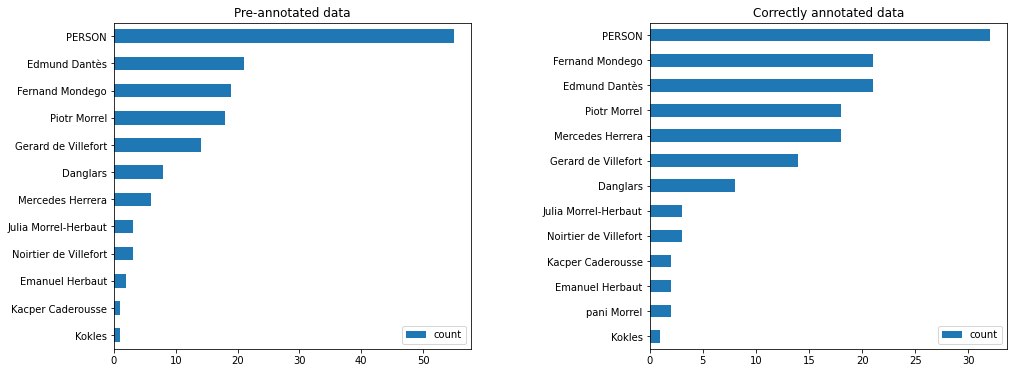

Nad_Niemnem


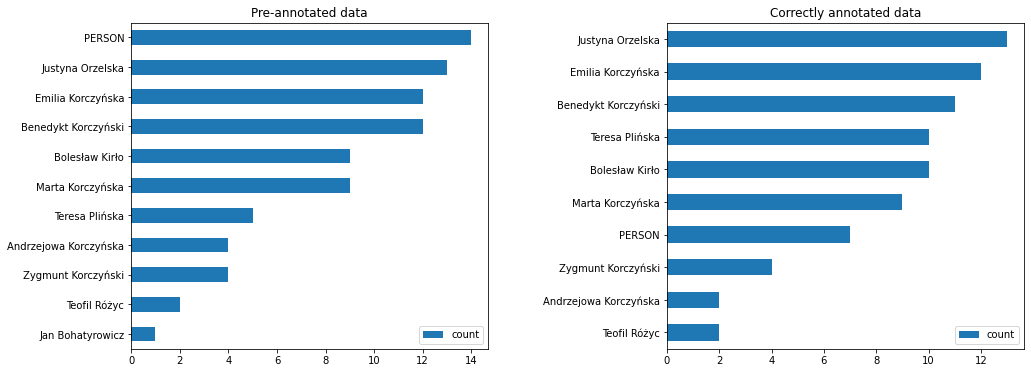

Robinson_Crusoe


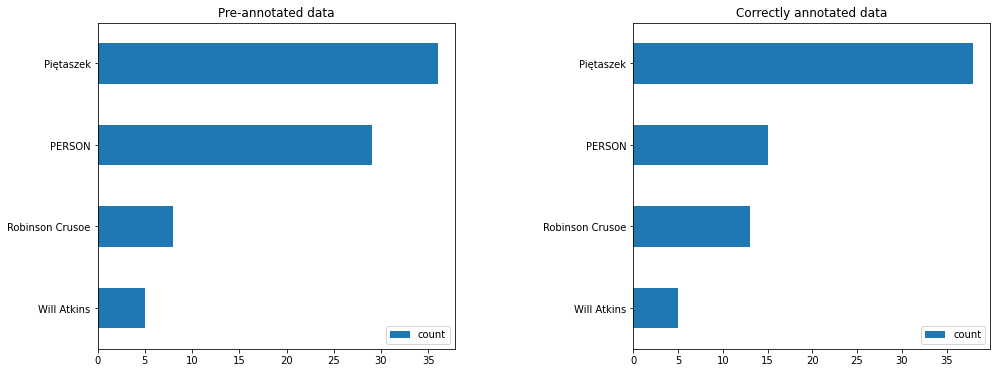

Przedwiosnie


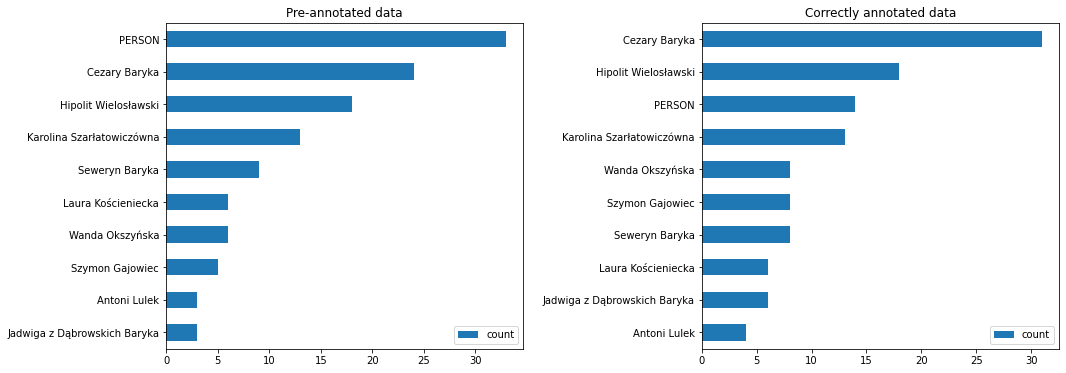

W_pustyni_i_w_puszczy


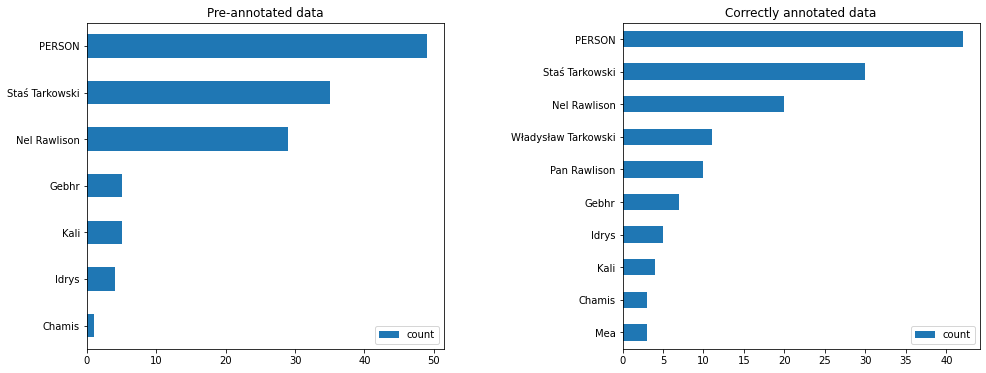

Ksiega_dzungli


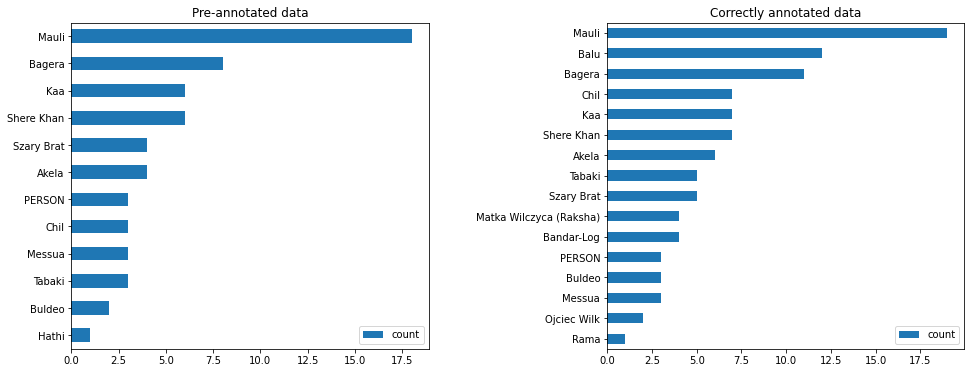

In [121]:
for title in TITLES:
    plot_novel_character_statistics(title)

 ## Books' statistics

In [25]:
def count_word_average_length(doc):
    tokens_text = []
    for token in doc:
        tokens_text.append(token.text)

    words = []
    for token in tokens_text:
        if not (nlp.vocab[token].is_stop or nlp.vocab[token].is_punct):
            words.append(token)

    num_of_characters = 0
    for word in words:
        num_of_characters += len(word)

    return num_of_characters / len(words)


def count_sentence_average_character_length(sentences):
    num_of_characters = 0
    for sent in sentences:
        num_of_characters += len(sent)

    return num_of_characters / len(sentences)


def count_sentence_average_word_length(sentences, nlp):
    num_of_words = 0
    for sent in sentences:
        num_of_words += len(nlp(sent))

    return num_of_words / len(sentences)

def calculate_statistics(title, df):
    annotations = read_annotations(PATH_TO_GOLD_ANNOTATIONS + f'{title}.json')
    contents = [a['content'] for a in annotations]

    nlp = Polish()
    doc = nlp(' '.join(contents))
    df.loc[title, 'average_word_length'] = count_word_average_length(doc)
    df.loc[title, 'average_sentence_length'] = count_sentence_average_character_length(contents)
    df.loc[title, 'average_num_of_words_in_sentence'] = count_sentence_average_word_length(contents, nlp)


In [28]:
statistics_df = pd.DataFrame()
for title in TITLES:
    calculate_statistics(title, statistics_df)
statistics_df

,average_word_length,average_sentence_length,average_num_of_words_in_sentence
Hrabia_Monte_Christo,7.139299,99.757576,18.776515
Nad_Niemnem,6.956464,87.963542,17.010417
Robinson_Crusoe,6.927389,89.408072,16.771300
Przedwiosnie,7.437500,110.930000,19.880000
W_pustyni_i_w_puszczy,6.950966,135.190909,25.454545
Ksiega_dzungli,6.621015,88.560000,17.720000


In [27]:
statistics_df

,average_word_length,average_sentence_length,average_num_of_words_in_sentence
Hrabia_Monte_Christo,7.139299,99.757576,18.776515


In [16]:
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

1 IS_ALPHA 1 4 Emilia z niezwykłą
1 IS_ALPHA 3 6 niezwykłą u niej
1 IS_ALPHA 4 7 u niej żywością
1 IS_ALPHA 7 10 poruszyła się na
1 IS_ALPHA 8 11 się na szezlongu
1 IS_ALPHA 10 13 szezlongu i wołać
1 IS_ALPHA 20 23 Tereni nie dokuczać
1 IS_ALPHA 24 27 Niech pan jej
1 IS_ALPHA 25 28 pan jej nie
1 IS_ALPHA 26 29 jej nie dręczy
1 IS_ALPHA 30 33 Ją dziś zęby
1 IS_ALPHA 36 39 wyprostował się.
1 IS_ALPHA 42 45 wyrzekł z powagą
1 IS_ALPHA 55 58 pożądanym nie jest
1 IS_ALPHA 56 59 nie jest,
1 IS_ALPHA 63 66 indziej sobie na
1 IS_ALPHA 64 67 sobie na niego
1 IS_ALPHA 65 68 na niego i
1 IS_ALPHA 66 69 niego i bardzo
1 IS_ALPHA 67 70 i bardzo zęby
1 IS_ALPHA 74 77 cóż mam robić
1 IS_ALPHA 84 87 darmo już zaspokoić
1 IS_ALPHA 88 91 Taki to los
1 IS_ALPHA 92 95 człowieka na tym
1 IS_ALPHA 93 96 na tym świecie
1 IS_ALPHA 97 100 Żadnej za nic
1 IS_ALPHA 98 101 za nic nagrody
1 IS_ALPHA 102 105 Ale nie!
1 IS_ALPHA 107 110 nagle i z
1 IS_ALPHA 108 111 i z komiczną
1 IS_ALPHA 112 115 zwracając się do
1 